# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/justmarkham/DAT4-students/blob/master/kerry/Final/NBA_players_2015.csv), [data dictionary](https://github.com/justmarkham/DAT-project-examples/blob/master/pdf/nba_paper.pdf)
- **Goal:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [11]:
# read the data into a DataFrame
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT4-students/master/kerry/Final/NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [12]:
# examine the columns
nba.head(1)

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1,0.05,-2.6,-0.7,-3.4,-0.3


In [74]:
# examine the pos column, how many of each?
nba['pos'].value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [17]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

# a list of of the cols we care about
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

In [21]:
# create feature matrix (X)
X = nba[feature_cols]

In [23]:
# create response vector (y)
y = nba.pos_num

## Step 3: Train a KNN model (K=5)

In [24]:
# import class
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# instantiate a KNN calssifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
# fit with data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

## Step 4: Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [27]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [28]:
# make a prediction with this new data point
knn.predict(player)

array([2])

In [29]:
# calculate predicted probabilities for each type
knn.predict_proba(player)

array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [37]:
# repeat for K=50
knn50 = KNeighborsClassifier(n_neighbors=50)
knn50.fit(X,y)
knn50.predict(player)

array([1])

In [38]:
# calculate predicted probabilities
knn50.predict_proba(player)

array([[ 0.06,  0.62,  0.32]])

## Bonus: Explore the features to decide which ones are predictive

In [54]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [72]:
# description of assists grouped by position
nba.groupby('pos').ast.sum()

pos
C     74.7
F    233.5
G    545.8
Name: ast, dtype: float64

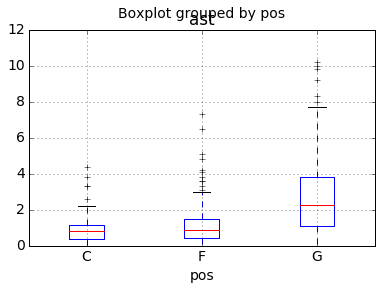

In [60]:
# box plot of assists grouped by position
nba.boxplot(by='pos', column='ast')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1204956d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12041c050>]], dtype=object)

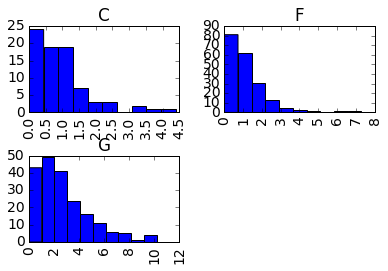

In [61]:
# histogram of assists grouped by position
nba.hist(column='ast', by='pos')

** Did you find anything cool? ** 

In [62]:
import seaborn as sns

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/Users/octaviapayne/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


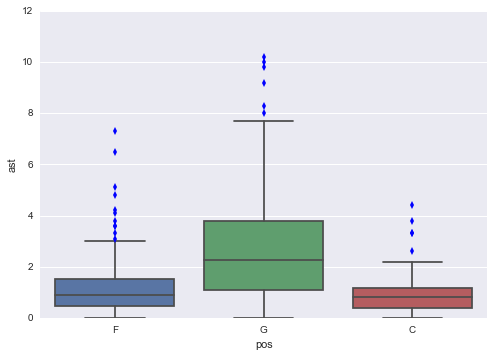

In [63]:
sns.boxplot(x="pos",y="ast",data=nba)

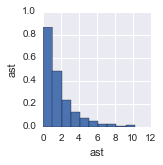

In [66]:
sns.distplot()